In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from itertools import product

sns.set()

from src.settings import *

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA

In [5]:
def read_embedding(method, name, dim):
    X = pd.read_csv(
        '{}/models/{}_{}_d{}.csv'.format(PATH_TO_DUMPS, method, name, dim),
        delim_whitespace=True, header=None,
        skiprows=1,
        index_col=0
    ).sort_index()
    X.index.name=None
    return X

In [80]:
methods = [
    'deepwalk', 
    'n2v_p1_q1', 
    'hist_loss',
    'hist_loss_l1e-05',
]
names = ['Email']
dims = [2, 16, 32, 64]

Xs = {}
for method, name, dim in product(methods, names, dims):
    try:
        Xs[(method, name, dim)] = read_embedding(method, name, dim)
    except:
        print('Failed to load {}_{}_d{}.csv'.format(method, name, dim))

Failed to load hist_loss_l1e-05_Email_d2.csv
Failed to load hist_loss_l1e-05_Email_d16.csv
Failed to load hist_loss_l1e-05_Email_d32.csv
Failed to load hist_loss_l1e-05_Email_d64.csv


In [74]:
ys = {}
colors = {}
label_count = {
    'Karate': 2,
    'Football': 12,
    'Stars': 5,
    'PolBooks': 3,
    'Protein': 13,
    'Email': 42
}

ys['Karate'] = pd.read_csv(
    PATH_TO_KARATE + '/karate.mylabels',
    header=None,
    squeeze=True
)
colors['Karate'] = np.random.rand(2, 3)
ys['Football'] = pd.read_csv(
    PATH_TO_FOOTBALL + '/football_labels.txt',
    header=None,
    squeeze=True
)
colors['Football'] = np.random.rand(12, 3)
ys['Stars'] = pd.read_csv(
    PATH_TO_STARS + '/stars_labels.txt',
    header=None,
    squeeze=True
)
colors['Stars'] = np.random.rand(5, 3)
ys['PolBooks'] = pd.read_csv(
    PATH_TO_POLBOOKS + '/polbooks_labels.txt',
    header=None,
    squeeze=True
)
colors['PolBooks'] = np.random.rand(3, 3)
ys['Protein'] = pd.read_csv(
    PATH_TO_PROTEIN + '/protein_new_labels.txt',
    header=None,
    squeeze=True
)
colors['Protein'] = np.random.rand(13, 3)
ys['Email'] = pd.read_csv(
    PATH_TO_EMAIL + '/email-Eu-core_labels.txt',
    delimiter=' ',
    header=None
)[1]
colors['Email'] = np.random.rand(42, 3)

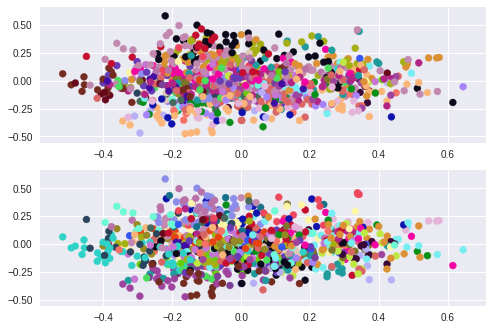

In [86]:
key = ('hist_loss', 'Email', 64)
name, dim = key[1], key[2]
X_tmp = Xs[key].values
if dim > 2:
    X_tmp = PCA(n_components=2).fit_transform(X_tmp)
plt.subplot(211)
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], c=[colors[name][x] for x in ys[name]])
clus = AgglomerativeClustering(n_clusters=label_count[name])
y_pred = clus.fit_predict(Xs[key])
plt.subplot(212)
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], c=[colors[name][x] for x in y_pred])
plt.show()

In [82]:
for key in Xs:
    name = key[1]
    clus = AgglomerativeClustering(n_clusters=label_count[name])
    y_pred = clus.fit_predict(Xs[key])
    score = normalized_mutual_info_score(ys[name], y_pred)
    print(key, score)

('deepwalk', 'Email', 2) 0.369904797786
('deepwalk', 'Email', 16) 0.630748076479
('deepwalk', 'Email', 32) 0.639339478156
('deepwalk', 'Email', 64) 0.633147203447
('n2v_p1_q1', 'Email', 2) 0.403353695106
('n2v_p1_q1', 'Email', 16) 0.685807065837
('n2v_p1_q1', 'Email', 32) 0.723558591662
('n2v_p1_q1', 'Email', 64) 0.714328834817
('hist_loss', 'Email', 2) 0.422688635622
('hist_loss', 'Email', 16) 0.632670874951
('hist_loss', 'Email', 32) 0.598734573468
('hist_loss', 'Email', 64) 0.626721470573
